In [2]:
import os
print("Notebook CWD:", os.getcwd())


Notebook CWD: c:\Users\Jouke\Documents\evedata-logger\notebooks


In [3]:
print("Project root contains:", os.listdir(".."))
print("Market history folder contains:", os.listdir("../output/market_history"))


Project root contains: ['.env', '.git', '.gitignore', '.venv', 'notebooks', 'output', 'README.md', 'requirements.txt', 'scripts', 'sql']
Market history folder contains: ['forge_region_orders_sample.csv', 'market_history_batch_1.csv', 'market_history_batch_10.csv', 'market_history_batch_2.csv', 'market_history_batch_3.csv', 'market_history_batch_4.csv', 'market_history_batch_5.csv', 'market_history_batch_6.csv', 'market_history_batch_7.csv', 'market_history_batch_8.csv', 'market_history_batch_9.csv', 'median_daily_liquidity.csv']


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Verify notebook CWD
print("CWD:", os.getcwd())

# If you prefer a relative path (from notebooks/ up one level):
csv_path = "../output/market_history/market_history_batch_1.csv"

# Or use an absolute path with a raw string:
# csv_path = r"C:\Users\Jouke\Documents\evedata-logger\output\market_history\market_history_batch_1.csv"

print("Loading:", csv_path)
df = pd.read_csv(csv_path, parse_dates=["date"])
print(df.head())


CWD: c:\Users\Jouke\Documents\evedata-logger\notebooks
Loading: ../output/market_history/market_history_batch_1.csv
   average       date  highest  lowest  order_count   volume  type_id
0    39.00 2024-05-01    39.00   38.99           72   755298       18
1    31.27 2024-05-02    31.27   31.22           78  1259473       18
2    31.29 2024-05-03    31.29   31.27           73  1785475       18
3    31.34 2024-05-04    37.98   31.31           77   986104       18
4    31.35 2024-05-05    33.00   31.34           79  1375376       18


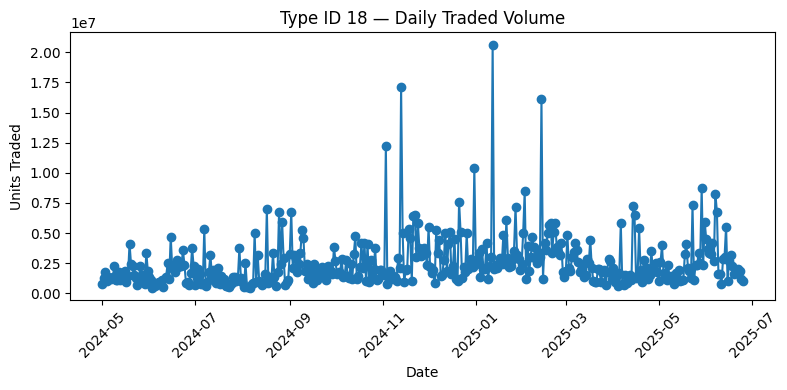

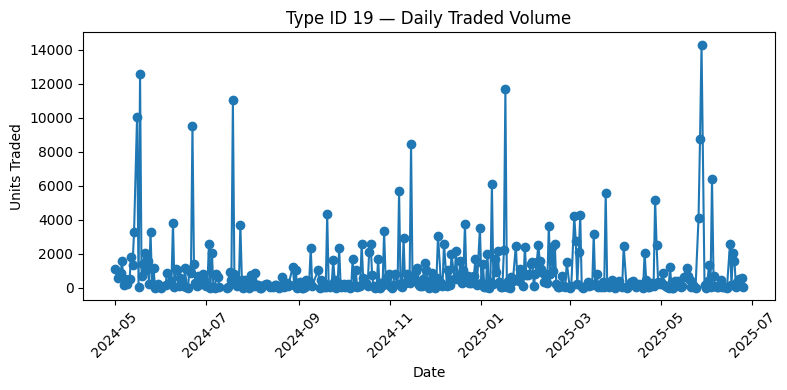

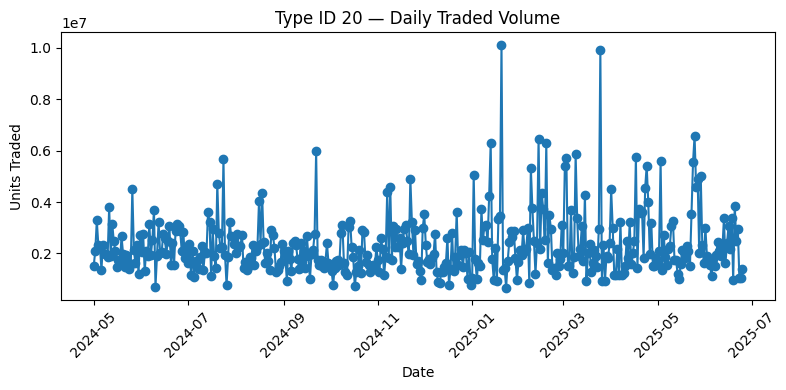

In [9]:
# 1) Aggregate daily volume per type_id
daily_vol = df.groupby(["type_id", "date"])["volume"].sum().reset_index()

# 2) Pick a few type_ids to plot (e.g. the first three in this batch)
sample_ids = daily_vol["type_id"].unique()[:3]

# 3) Plot daily traded volume for each
for tid in sample_ids:
    sub = daily_vol[daily_vol["type_id"] == tid]
    plt.figure(figsize=(8,4))
    plt.plot(sub["date"], sub["volume"], marker="o", linestyle="-")
    plt.title(f"Type ID {tid} — Daily Traded Volume")
    plt.xlabel("Date")
    plt.ylabel("Units Traded")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
